## Observations and Insights 

In [76]:
import pandas as pd
import numpy as np


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how ='left')

# Display the data table for preview
combine_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combine_data)

1893

In [8]:
combine_data_df = pd.DataFrame(combine_data)

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = combine_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
groupbyed = pd.DataFrame(groupby)

In [11]:
# Checking the number of mice in the clean DataFrame.
len(df)

1888

In [16]:
groupbyed_sort = df.sort_values(["Tumor Volume (mm3)"], ascending=True)
groupbyed_sort

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_groupby = groupbyed_sort.groupby(["Drug Regimen"])
regimen_mean = regimen_groupby["Tumor Volume (mm3)"].mean()
regimen_median = regimen_groupby["Tumor Volume (mm3)"].median()
regimen_variance = regimen_groupby["Tumor Volume (mm3)"].var()
regimen_std = regimen_groupby["Tumor Volume (mm3)"].std()
regimen_sem = regimen_groupby["Tumor Volume (mm3)"].sem()
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

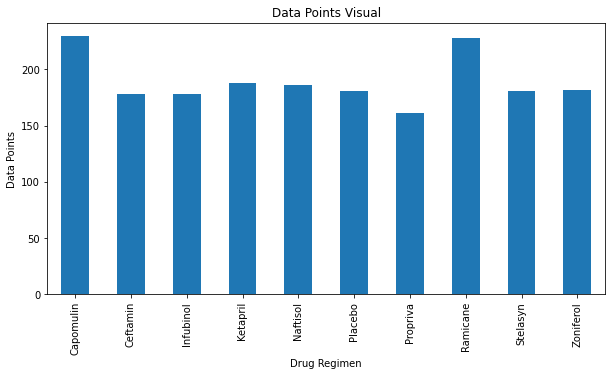

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_data_points = combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points
regimen_data_points.plot(kind="bar", figsize=(10,5))
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

In [25]:
regimen_data_points = combine_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

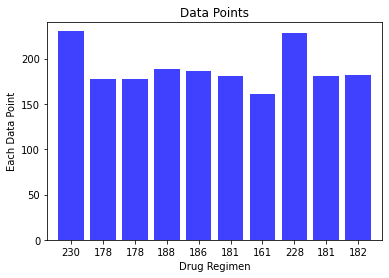

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Data_Points = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, Data_Points, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Data_Points)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(Data_Points)+10)

plt.title("Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Each Data Point")

plt.show()

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = combine_data.groupby(["Mouse ID","Sex"])
gender
gender_df = pd.DataFrame(gender.size())
gender_df
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())

mouse_gender.columns = ["Total Count"]
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))


In [37]:
mouse_gender 

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

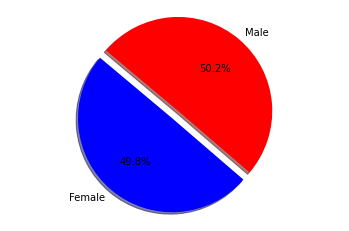

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.799197,50.200803]
colors = ['blue', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_regimes = combine_data[combine_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatment_regimes = treatment_regimes.sort_values(["Timepoint"], ascending=True)
treatment_regimes
treatment_regimes_data = treatment_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
treatment_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens_sort = treatment_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
treatment_regimens_sort.head()
treatment_regimen_df = pd.DataFrame(treatment_regimens_sort)
treatment_regimen_df


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
treatment_regimen_df   

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

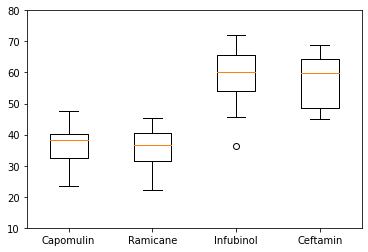

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_df = treatment_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(treatment_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=treatment_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

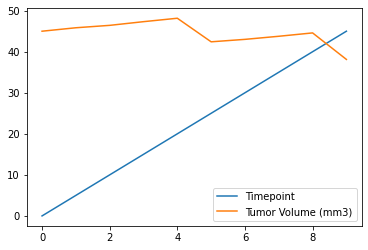

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

time_vs_tumer = combine_data[combine_data["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


In [56]:
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

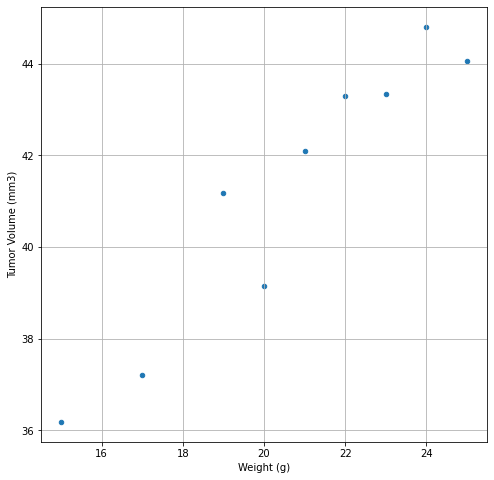

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter = combine_data[combine_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = treatment_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter_plot = capomulin_scatter.reset_index()
capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)



capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

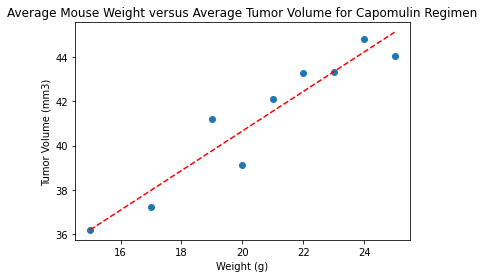

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)
slope, int, r, p, std_err = st.linregress(x_values, y_values)
fit = slope * x_values + int
plt.scatter(x_values, y_values)
plt.plot(x_values, fit, "--", color="r")
plt.title("Average Mouse Weight versus Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

In [72]:
correlation

(0.9505243961855269, 8.449451040646294e-05)